<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/submit_mp_ukmarket_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
car_df = pd.read_csv('/content/drive/MyDrive/ds6/cars.csv')

In [ ]:
brand_df = pd.read_csv('/content/drive/MyDrive/ds6/brand.csv')

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


자동차 데이터와 브랜드 데이터 합치기

In [ ]:
car_df['brand'] = car_df['title'].str.split(expand = True)[0]

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [ ]:
# Q. brand_df의 title 컬럼에 저장된 값들을 대문자로 변환합니다.
brand_df['title'] = brand_df['title'].str.upper()


In [ ]:
brand_df.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [ ]:
# Q. car_df의 brand 컬럼과 brand_df의 title 컬럼을 기준으로 데이터를 합칩니다.
# (힌트: car_df에서 left merge를 수행합니다.)

car_df = car_df.merge(brand_df, left_on = 'brand', right_on = 'title', how = 'left')

In [ ]:
# Q. car_df에서 중복되는 컬럼 title_y를 제거합니다.
car_df.drop('title_y', axis = 1, inplace = True)

In [ ]:
# Q. car_df에서 title_x 컬럼의 이름을 title로 변경합니다
car_df = car_df.rename({'title_x': 'title'}, axis = 1)


In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [ ]:


car_df = car_df.rename({'brand_x': 'brand'}, axis = 1)

In [ ]:
# car_df의 복사본 bonus_df를 생성합니다.
bonus_df = car_df.copy()

카테고리형 변수를 숫자 형태로 변환하기

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [ ]:
# Q. Engine 컬럼의 데이터에서 L 문자를 제거하여 숫자 부분만 저장

car_df['Engine'] = car_df['Engine'].str.split('L',expand = True)[0]

# Q. Emission Class 컬럼에서도 숫자 부분만 추출하여 저장
car_df['Emission Class'] = car_df['Emission Class'].str.split(expand = True)[1]

In [ ]:
# Q. to_numeric 메서드를 사용하여 Engine, Emission Class 컬럼의 자료형을 숫자 형태로 변환
car_df['Engine'] = pd.to_numeric(car_df['Engine'])

In [ ]:
car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'])

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   float64
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 432.2+ KB


In [ ]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3642.000000,3662.000000,3652.000000,3600.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,1.606260,4.321409,4.900329,4.910000
std,4480.629885,3.941718e+04,5.082387,1.546028,0.486584,0.986760,0.577046,0.910688
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


결측치 제거

In [ ]:
# car_df의 컬럼별로 결측치의 비율
car_df.isna().mean()

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.382696
Fuel type,0.000000
Body type,0.000000
Engine,0.012205
Gearbox,0.000000
Doors,0.006781


In [ ]:
# Service history 컬럼에 포함된 값들을 중복 없이 보여줍니다.
car_df['Service history'].unique()

array([nan, 'Full'], dtype=object)

In [ ]:
# Q. Service history 값에 따라 그룹으로 묶어 Price의 평균을 계산
car_df.groupby('Service history')['Price'].mean()

,Price
Service history,
Full,7290.209259


In [ ]:
# Q. Service history 컬럼의 결측치를 'Unknown' 문자열로 채웁
car_df['Service history'] = car_df['Service history'].fillna('Unknown')

In [ ]:

car_df.groupby('Service history')['Price'].mean()

,Price
Service history,
Full,7290.209259
Unknown,5529.414045


In [ ]:
# Engine 컬럼의 결측치를 확인
car_df[car_df['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,BMW,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,TOYOTA,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,NISSAN,Japan
1087,AUDI A1,7995,50500,2012,NaN,Petrol,Hatchback,NaN,Automatic,3.0,4.0,NaN,Unknown,AUDI,Germany
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,Unknown,MAZDA,Japan
1429,FORD FOCUS,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,Unknown,FORD,United States
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,CITROEN,France
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,FORD,United States
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,AUDI,Germany
2136,TOYOTA PRIUS,8950,66000,2012,NaN,Petrol Hybrid,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,TOYOTA,Japan


In [ ]:
# 결측치가 포함된 컬럼의 개수를 데이터마다 계산하여 na_values 컬럼에 저장

car_df['na_values'] = car_df.isna().sum(axis = 1)

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom,0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea,1
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom,0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom,1


In [ ]:
len(car_df[car_df['na_values'] >= 4])

13

In [ ]:
# Q. na_values 컬럼의 값이 4 이상인 데이터는 제거

car_df = car_df[car_df['na_values']  < 4]

In [ ]:
# na_values 컬럼을 제거

car_df.drop('na_values',axis= 1, inplace = True)

In [ ]:
car_df.isna().mean() # 결측치확인

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.382961
Fuel type,0.000000
Body type,0.000000
Engine,0.009526
Gearbox,0.000000
Doors,0.003266


다른 컬럼들의 결측치를 채우기 위해, 히스토그램을 그리고 중앙값을 계산

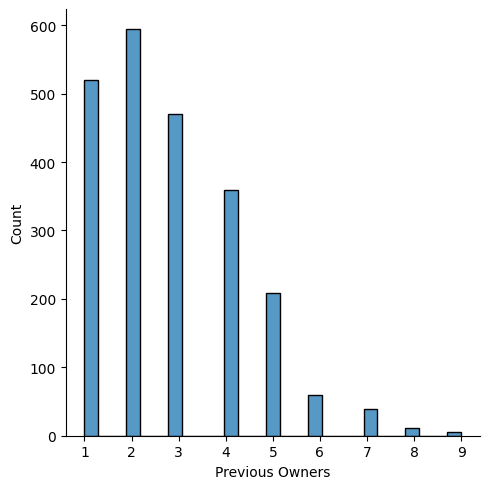

In [ ]:
# Previous Owners 컬럼의 히스토그램

sns.displot(car_df['Previous Owners'])  # mean로 채울시 데이터 상태 확인

In [ ]:
# Previous Owners 컬럼의 중앙값을 계산
car_df['Previous Owners'].median()

3.0

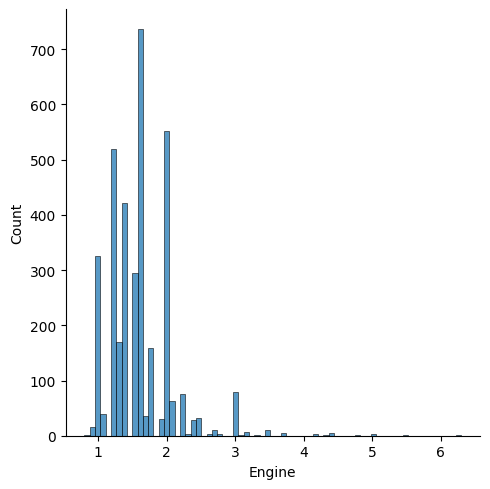

In [ ]:
sns.displot(car_df['Engine'])

In [ ]:
car_df['Engine'].mean()

np.float64(1.6061555372355043)

In [ ]:
car_df['Engine'].median()

1.6

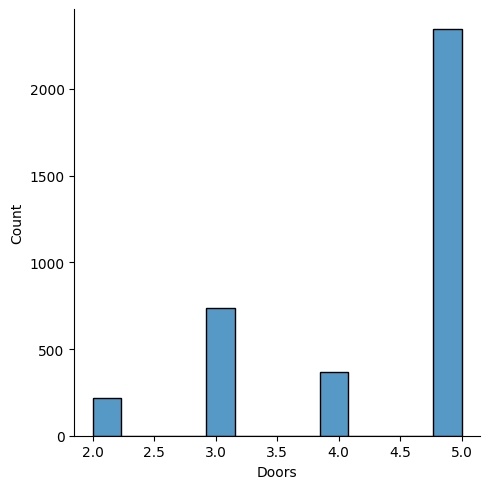

In [ ]:
sns.displot(car_df['Doors'])

In [ ]:
car_df['Doors'].median()

5.0

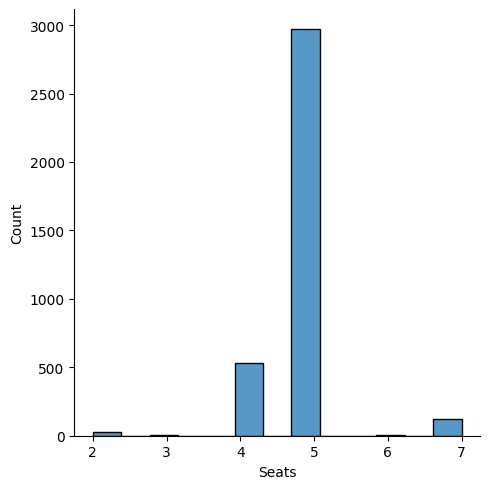

In [ ]:
sns.displot(car_df['Seats'])

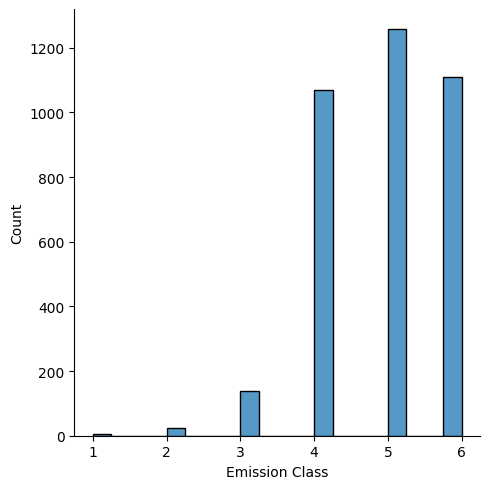

In [ ]:
sns.displot(car_df['Emission Class'])

In [ ]:
# Q. 해당 컬럼들의 중앙값으로 결측치를 채움


numeric_cols = car_df.select_dtypes(include=['int64', 'float64']).columns
car_df[numeric_cols] = car_df[numeric_cols].fillna(car_df[numeric_cols].median())

이상치 제거

In [ ]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3674.000000,3.674000e+03,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000
mean,5788.852477,8.134587e+04,2011.847305,2.882145,1.606097,4.323625,4.900925,4.911813
std,4486.599984,3.943769e+04,5.083173,1.219004,0.484326,0.985908,0.575367,0.901556
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2016.000000,3.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [ ]:
# Price 컬럼의 값들을 정렬하여 보여줍니다.
car_df['Price'].sort_values()

,Price
3245,400
3278,450
1238,495
3246,499
3242,500
...,...
3230,25995
3102,25995
3224,28240
2936,30000


In [ ]:
# Mileage(miles) 컬럼의 값들을 정렬하여 보여줍니다.

car_df['Mileage(miles)'].sort_values()

,Mileage(miles)
3100,1
3219,1
2013,6
3102,222
2760,1048
...,...
1478,274100
1685,274100
1946,274100
2048,274100


In [ ]:
# Mileage 값이 1000 미만인 데이터 제거

car_df = car_df[car_df['Mileage(miles)'] > 1000]



In [ ]:
car_df['Registration_Year'].sort_values()

,Registration_Year
3024,1953
237,1972
2375,1981
1239,1985
1195,1987
...,...
2080,2022
2760,2023
2967,2023
3173,2023


In [ ]:
# Registration_Year 컬럼의 값이 2025 미만인 데이터만 추출

car_df = car_df[car_df['Registration_Year'] < 2025]

In [ ]:
car_df['Previous Owners'].sort_values()

,Previous Owners
3321,1.0
3304,1.0
2534,1.0
2533,1.0
2530,1.0
...,...
1314,9.0
3463,9.0
404,9.0
212,9.0


In [ ]:
car_df[car_df['Previous Owners'] == 9]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,VAUXHALL,United Kingdom
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown,BMW,Germany
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown,MINI,United Kingdom
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France


In [ ]:
# Q. brand 컬럼의 값에 따라 데이터를 그룹화하여 Price의 평균, 표준편차를 계산합니다.
# (agg() 함수를 사용해주세요.)

car_df.groupby('brand')['Price'].agg(['mean', 'std'])

,mean,std
brand,,
ABARTH,11216.333333,6039.482621
ALFA,3197.388889,2495.694814
AUDI,7719.527397,4866.621560
BMW,8325.981343,6036.639654
CHEVROLET,3331.642857,1306.453191
CHRYSLER,2433.800000,796.043152
CITROEN,4652.873684,3291.745835
DACIA,7439.571429,3647.734338
DAEWOO,995.000000,NaN


In [ ]:
# Q. brand와 Fuel type 컬럼을 기준으로 Price 값의 피벗 테이블을 생성

pd.pivot_table(car_df,index = 'brand', columns = 'Fuel type', values = 'Price')

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
ABARTH,NaN,NaN,NaN,11216.333333,NaN,NaN
ALFA,4214.666667,NaN,NaN,2688.750000,NaN,NaN
AUDI,8731.301205,NaN,NaN,6386.555556,NaN,NaN
BMW,7342.022222,23220.0,NaN,7058.486239,NaN,19460.652174
CHEVROLET,5249.500000,NaN,NaN,3012.000000,NaN,NaN
CHRYSLER,NaN,NaN,NaN,2433.800000,NaN,NaN
CITROEN,4026.891892,NaN,NaN,5052.206897,NaN,NaN
DACIA,6754.600000,NaN,NaN,7820.111111,NaN,NaN
DAEWOO,NaN,NaN,NaN,995.000000,NaN,NaN


In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


<Axes: xlabel='Previous Owners', ylabel='Price'>

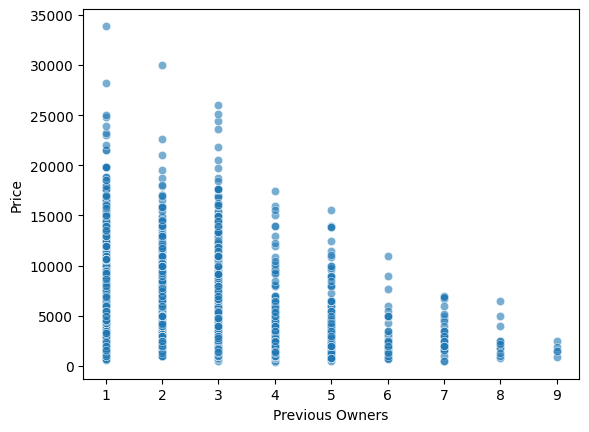

In [ ]:
# Previous Owners와 Price 사이의 scatter plot을 그립니다.

sns.scatterplot(x=car_df['Previous Owners'], y = car_df['Price'], alpha=0.6)

<Axes: xlabel='Registration_Year', ylabel='Price'>

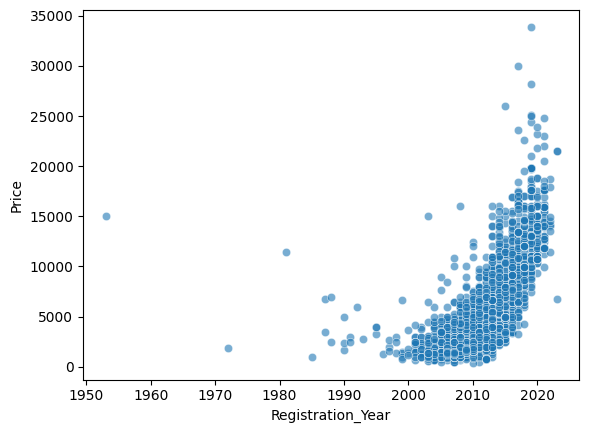

In [ ]:
# Registration_Year와 Price 사이의 scatter plot을 그립니다.

sns.scatterplot(x=car_df['Registration_Year'], y = car_df['Price'], alpha=0.6)

<Axes: xlabel='Registration_Year', ylabel='Price'>

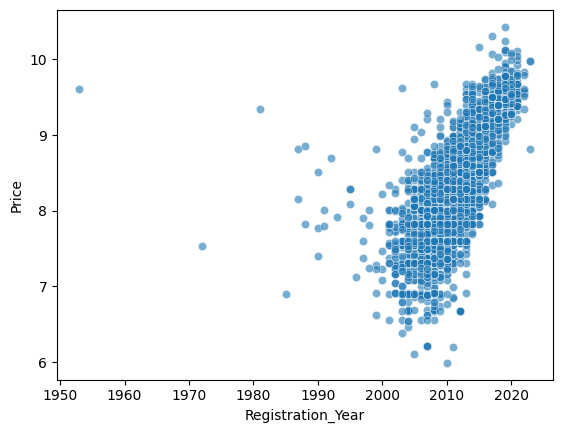

In [ ]:
sns.scatterplot(x=car_df['Registration_Year'], y = np.log(car_df['Price']), alpha=0.6)

scaler

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [ ]:
# 특정 컬럼들이 몇 종류의 데이터로 이루어져 있는지 계산합니다.


car_df[['title','Fuel type','Body type','Gearbox','Emission Class','Service history','brand','country']].nunique()




,0
title,448
Fuel type,6
Body type,10
Gearbox,2
Emission Class,6
Service history,2
brand,48
country,12


In [ ]:
car_df.drop('title', axis = 1, inplace = True) # car_df 안에서 title 열을 완전히 제거해서 불필요하거나 분석에 방해되는 텍스트 데이터 정리

In [ ]:
# 자동차의 브랜드별로 데이터의 개수를 계산합니다.


car_df['brand'].value_counts()


,count
brand,
VAUXHALL,549
FORD,409
VOLKSWAGEN,271
BMW,268
PEUGEOT,245
TOYOTA,193
NISSAN,178
RENAULT,175
MERCEDES-BENZ,168


In [ ]:
# 자동차의 브랜드별로 평균 가격을 계산합니다.

car_df.groupby('brand')['Price'].mean()

,Price
brand,
ABARTH,11216.333333
ALFA,3197.388889
AUDI,7719.527397
BMW,8325.981343
CHEVROLET,3331.642857
CHRYSLER,2433.800000
CITROEN,4652.873684
DACIA,7439.571429
DAEWOO,995.000000


In [ ]:
# Q. 자동차의 브랜드별로 데이터 개수와 평균 가격을 출력합니다.
# (위에서 출력했던 데이터 두 가지를 join 메서드로 합쳐주세요.)

pd.DataFrame(car_df['brand'].value_counts()).join(car_df.groupby('brand')['Price'].mean()) # 판다스는 join 을 지원하지 않음--> df

,count,Price
brand,,
VAUXHALL,549,4658.207650
FORD,409,4859.144254
VOLKSWAGEN,271,6513.217712
BMW,268,8325.981343
PEUGEOT,245,5463.955102
TOYOTA,193,5282.544041
NISSAN,178,6529.415730
RENAULT,175,5623.371429
MERCEDES-BENZ,168,7703.041667


In [ ]:
# 범주형 컬럼들에 원-핫 인코딩을 적용합니다.

car_df = pd.get_dummies(car_df, drop_first = True)  # 원 핫 인코딩

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Q. Robust Scaler를 rs 변수로 정의해줍니다.

rs = RobustScaler()

In [ ]:
# Q. robust scaling을 적용한 데이터프레임을 car_df 변수에 다시 저장합니다.


car_df = pd.DataFrame(rs.fit_transform(car_df), columns = car_df.columns)

PCA

In [ ]:
from sklearn.decomposition import PCA #  Scikit-learn의 차원 축소 알고리즘 PCA(주성분 분석)

In [ ]:
# Q. 주성분이 5개인 PCA 모델을 정의합니다.
pca = PCA(5)
pca.fit(car_df)




PCA(n_components=5)

In [ ]:
# Q. 원본 데이터 대비 PCA 데이터의 분산(explained variance) print(pca.explained_variance_ratio_.sum())비율 계산.

pca.explained_variance_ratio_.sum()

np.float64(0.6402265237371985)

In [ ]:
for i in range(2, 11):
    pca = PCA(i)
    pca.fit(car_df)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.41
3 0.52
4 0.59
5 0.64
6 0.68
7 0.71
8 0.74
9 0.77
10 0.79


In [ ]:
pca = PCA(7)

In [ ]:
# Q. 주성분 개수가 7개일 때, PC1~PC7 컬럼을 출력합니다.


pd.DataFrame(pca.fit_transform(car_df), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.514980,-0.422637,0.415003,0.646676,0.287282,0.032610,0.017744
1,1.312384,-1.217170,-0.349554,-0.268356,-0.159763,0.998415,-0.070193
2,0.812080,-0.223882,-1.006030,0.654407,0.663232,0.051149,-0.084697
3,1.961983,-1.312642,0.517619,-0.709751,0.546531,0.644088,-0.133217
4,0.267575,-0.653314,-0.514638,0.555964,-0.125742,1.161923,-0.179273
...,...,...,...,...,...,...,...
3664,1.427772,-0.807223,-0.187850,0.093612,-0.565527,-0.429525,0.001001
3665,0.435272,1.081559,0.283845,-0.141185,0.549215,-0.033513,0.091047
3666,0.757281,1.455642,0.085260,0.230943,0.864446,0.084921,-0.061957
3667,1.658730,1.682128,-1.001384,0.811344,0.409602,-0.056047,-0.769035


bonus

In [ ]:
# Q. 국가별로 브랜드의 개수를 계산해봅시다.
# (이전에 복사해둔 bonus_df를 사용합니다.)

bonus_df.groupby('country')['brand'].count()

,brand
country,
Czech Republic,63
France,522
Germany,863
Italy,128
Japan,641
Malaysia,3
Romania,14
South Korea,178
Spain,60


In [ ]:
bonus_df.groupby('country')['brand'].nunique()

,brand
country,
Czech Republic,1
France,4
Germany,6
Italy,4
Japan,11
Malaysia,1
Romania,1
South Korea,4
Spain,1


In [ ]:
bonus_df.select_dtypes(include='number').corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000
